# Lesson 4 Тема “Обучение без учителя”

## Задание 1

In [2]:
'''Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.'''

'Импортируйте библиотеки pandas, numpy и matplotlib.\nЗагрузите "Boston House Prices dataset" из встроенных наборов\nданных библиотеки sklearn.\nСоздайте датафреймы X и y из этих данных.\nРазбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)\nс помощью функции train_test_split так, чтобы размер тестовой выборки\nсоставлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.\nМасштабируйте данные с помощью StandardScaler.\nПостройте модель TSNE на тренировочный данных с параметрами:\nn_components=2, learning_rate=250, random_state=42.\nПостройте диаграмму рассеяния на этих данных.'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InLineBackend.figure_format = 'svg'
%matplotlib inline

In [10]:
from sklearn.datasets import load_boston

In [12]:
boston = load_boston()

In [18]:
data = boston.data

In [19]:
feature_names = boston.feature_names

In [20]:
X = pd.DataFrame(data, columns = feature_names)

In [29]:
target = boston.target

In [30]:
y = pd.DataFrame(target, columns = ['price'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

In [41]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [44]:
from sklearn.manifold import TSNE

In [52]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [62]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\Users\Alina\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


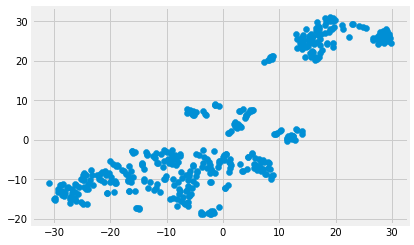

In [63]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

In [64]:
'''С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.'''

'С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.\nПараметр max_iter должен быть равен 100, random_state сделайте равным 42.\nПостройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,\nи раскрасьте точки из разных кластеров разными цветами.\nВычислите средние значения price и CRIM в разных кластерах.'

In [65]:
from sklearn.cluster import KMeans

In [67]:
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [68]:
X_train_labels = model.fit_predict(X_train_scaled)

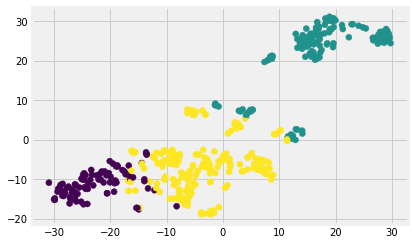

In [78]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = X_train_labels)

In [82]:
y_train[X_train_labels==0].mean()

price    27.788372
dtype: float64

In [83]:
y_train[X_train_labels==1].mean()

price    16.165354
dtype: float64

In [84]:
y_train[X_train_labels==2].mean()

price    24.958115
dtype: float64

In [85]:
X_train.loc[X_train_labels==0, 'CRIM'].mean()

0.07356558139534886

In [86]:
X_train.loc[X_train_labels==1, 'CRIM'].mean()

10.797028425196853

In [87]:
X_train.loc[X_train_labels==2, 'CRIM'].mean()

0.42166020942408367

## *Задание 3

In [88]:
'''Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.'''

'Примените модель KMeans, построенную в предыдущем задании,\nк данным из тестового набора.\nВычислите средние значения price и CRIM в разных кластерах на тестовых данных.'

In [89]:
test_labels = model.predict(X_test_scaled)

In [90]:
y_test[test_labels==0].mean()

price    31.35
dtype: float64

In [91]:
y_test[test_labels==1].mean()

price    16.437143
dtype: float64

In [92]:
y_test[test_labels==2].mean()

price    21.860784
dtype: float64

In [93]:
X_test.loc[test_labels==0, 'CRIM'].mean()

0.062060000000000004

In [94]:
X_test.loc[test_labels==1, 'CRIM'].mean()

10.165531142857143

In [95]:
X_test.loc[test_labels==2, 'CRIM'].mean()

0.26607882352941176